In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import urllib, json, requests


In [2]:
#read file
fires = pd.read_csv('FireOccurance1992-2020.csv')
counties = pd.read_json('usCountyBoundaries.json')

C:\Users\susmi\AppData\Local\Temp/ipykernel_36404/1731100500.py:2: DtypeWarning: Columns (10,12,13,14,15,16,17,18,19,20,27,28,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  fires = pd.read_csv('FireOccurance1992-2020.csv')


In [3]:
#see what is in dataframe
fires

,X,Y,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,-121.005820,40.036939,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,...,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,-120.404431,38.933050,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,-120.735542,38.984161,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,-119.913320,38.559161,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,-119.933043,38.559161,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303561,-108.959489,39.037884,2303562,400732978,ICS209_2020_11710294,INTERAGCY,IA-ICS209,BLM,USCOGRD,Grand Junction Field Office,...,NaN,1.00,B,39.037890,-108.959500,MISSING/NOT SPECIFIED,CO,NaN,NaN,NaN
2303562,-119.503043,37.148606,2303563,400732979,ICS209_2020_11781527,INTERAGCY,IA-ICS209,ST/C&L,USCAMMU,Merced-Mariposa Unit,...,NaN,100.00,D,37.148611,-119.503056,Private,CA,Madera,6039.0,Madera County
2303563,-114.442787,46.151364,2303564,400732980,ICS209_2020_11815219,INTERAGCY,IA-ICS209,FS,USMTBRF,Bitterroot National Forest,...,NaN,50.00,C,46.151370,-114.442800,MISSING/NOT SPECIFIED,MT,NaN,NaN,NaN
2303564,-120.114486,46.670334,2303565,400732982,ICS209_2020_11831809,INTERAGCY,IA-ICS209,FWS,USWAMCR,Mid Columbia National Wildlife Refuge Complex,...,1900.0,24892.00,G,46.670340,-120.114500,UNDEFINED FEDERAL,WA,Yakima,53077.0,Yakima County


In [4]:
counties

,geo_point_2d,geo_shape,statefp,countyfp,countyns,geoid,name,namelsad,stusab,lsad,...,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,state_name,countyfp_nozero
0,"{'lon': -83.6665354077, 'lat': 41.001938375}","{'type': 'Feature', 'geometry': {'coordinates'...",39,63,1074044,39063,Hancock,Hancock County,OH,6,...,534.0,22300.0,NaN,A,1376125660,6020647,41.000471,-83.666033,Ohio,63
1,"{'lon': -77.4574003866, 'lat': 38.4207190191}","{'type': 'Feature', 'geometry': {'coordinates'...",51,179,1480173,51179,Stafford,Stafford County,VA,6,...,548.0,47900.0,47894.0,A,697237202,28088011,38.413261,-77.451334,Virginia,179
2,"{'lon': -98.4999473753, 'lat': 40.1764332141}","{'type': 'Feature', 'geometry': {'coordinates'...",31,181,835912,31181,Webster,Webster County,NE,6,...,NaN,NaN,NaN,A,1489017962,337241,40.180646,-98.498590,Nebraska,181
3,"{'lon': -99.756726125, 'lat': 28.4225359982}","{'type': 'Feature', 'geometry': {'coordinates'...",48,127,1383849,48127,Dimmit,Dimmit County,TX,6,...,NaN,NaN,NaN,A,3441795367,14576535,28.423587,-99.765871,Texas,127
4,"{'lon': -91.1324230468, 'lat': 41.7723266607}","{'type': 'Feature', 'geometry': {'coordinates'...",19,31,465205,19031,Cedar,Cedar County,IA,6,...,NaN,NaN,NaN,A,1500798712,6385832,41.772360,-91.132610,Iowa,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,"{'lon': 145.777379252, 'lat': 15.1992652149}","{'type': 'Feature', 'geometry': {'coordinates'...",69,110,1805247,69110,Saipan,Saipan Municipality,MP,12,...,NaN,NaN,NaN,A,118890997,532767361,15.198095,145.777192,Northern Mariana Islands,110
3229,"{'lon': -100.394202624, 'lat': 40.5300832055}","{'type': 'Feature', 'geometry': {'coordinates'...",31,63,835853,31063,Frontier,Frontier County,NE,6,...,NaN,NaN,NaN,A,2524283299,14110075,40.530947,-100.406683,Nebraska,63
3230,"{'lon': -94.2741206259, 'lat': 35.1993218755}","{'type': 'Feature', 'geometry': {'coordinates'...",5,131,69181,5131,Sebastian,Sebastian County,AR,6,...,NaN,22900.0,NaN,A,1375720610,37325387,35.196981,-94.274989,Arkansas,131
3231,"{'lon': -97.5182740096, 'lat': 28.0087830727}","{'type': 'Feature', 'geometry': {'coordinates'...",48,409,1383990,48409,San Patricio,San Patricio County,TX,6,...,204.0,18580.0,NaN,A,1795990944,37577389,28.011794,-97.517157,Texas,409


In [10]:
#see dataframeshape
fires.shape

(2303566, 40)

In [11]:
#see dataframe columns
fires.columns

Index(['X', 'Y', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
       'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME'],
      dtype='object')

In [12]:
#see dataframe columns
counties.columns

Index(['geo_point_2d', 'geo_shape', 'statefp', 'countyfp', 'countyns', 'geoid',
       'name', 'namelsad', 'stusab', 'lsad', 'classfp', 'mtfcc', 'csafp',
       'cbsafp', 'metdivfp', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'state_name', 'countyfp_nozero'],
      dtype='object')

In [13]:
#drop unnecessary columns
fires = fires.drop(columns=['X', 'Y', 'OBJECTID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE',
       'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
       'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME',
       'NWCG_CAUSE_AGE_CATEGORY'])

# df.drop(columns=['column_nameA', 'column_nameB'])

In [14]:
3#rename columns if needed - make them lower cases
fires.columns = map(str.lower, fires.columns)

In [15]:
#filter data to only California
calfires = fires[fires['state'] == 'CA']
calfires

,fod_id,fpa_id,fire_name,fire_year,discovery_date,discovery_doy,discovery_time,nwcg_cause_classification,nwcg_general_cause,cont_date,...,cont_time,fire_size,fire_size_class,latitude,longitude,owner_descr,state,county,fips_code,fips_name
0,1,FS-1418826,FOUNTAIN,2005,2005/02/02 00:00:00+00,33,1300.0,Human,Power generation/transmission/distribution,2005/02/02 00:00:00+00,...,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,FS-1418827,PIGEON,2004,2004/05/12 00:00:00+00,133,845.0,Natural,Natural,2004/05/12 00:00:00+00,...,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,FS-1418835,SLACK,2004,2004/05/31 00:00:00+00,152,1921.0,Human,Debris and open burning,2004/05/31 00:00:00+00,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,FS-1418845,DEER,2004,2004/06/28 00:00:00+00,180,1600.0,Natural,Natural,2004/07/03 00:00:00+00,...,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,FS-1418847,STEVENOT,2004,2004/06/28 00:00:00+00,180,1600.0,Natural,Natural,2004/07/03 00:00:00+00,...,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303542,400732952,ICS209_2019_10757785,MARIA,2019,2019/10/31 00:00:00+00,304,2115.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,...,NaN,9999.00,G,34.337222,-119.053333,MISSING/NOT SPECIFIED,CA,Ventura,6111.0,Ventura County
2303543,400732953,ICS209_2019_10762771,BELMONT,2019,2019/05/29 00:00:00+00,149,1900.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,...,NaN,835.00,E,35.307500,-119.964444,MISSING/NOT SPECIFIED,CA,San Luis Obispo,6079.0,San Luis Obispo County
2303551,400732962,ICS209_2019_10781965,ROCK,2019,2019/06/25 00:00:00+00,176,2230.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,...,NaN,2422.00,F,37.472222,-121.249444,MISSING/NOT SPECIFIED,CA,Stanislaus,6099.0,Stanislaus County
2303556,400732973,ICS209_2019_10802166,WALKER,2019,2019/09/04 00:00:00+00,247,1446.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,...,NaN,54608.00,G,40.053250,-120.668900,MISSING/NOT SPECIFIED,CA,Plumas,6063.0,Plumas County


In [16]:
#check if FIPS code is null for any rows
calfires[calfires['fips_code'].isnull() == True]

,fod_id,fpa_id,fire_name,fire_year,discovery_date,discovery_doy,discovery_time,nwcg_cause_classification,nwcg_general_cause,cont_date,...,cont_time,fire_size,fire_size_class,latitude,longitude,owner_descr,state,county,fips_code,fips_name
7,8,FS-1418854,SLATE,2005,2005/03/08 00:00:00+00,67,1300.0,Human,Debris and open burning,2005/03/08 00:00:00+00,...,1600.0,0.8,B,40.968056,-122.433889,STATE OR PRIVATE,CA,NaN,NaN,NaN
8,9,FS-1418856,SHASTA,2005,2005/03/15 00:00:00+00,74,1200.0,Human,Debris and open burning,2005/03/15 00:00:00+00,...,1700.0,1.0,B,41.233611,-122.283333,STATE OR PRIVATE,CA,NaN,NaN,NaN
76,78,FS-1419054,LINTO,2005,2005/06/27 00:00:00+00,178,1007.0,Human,Debris and open burning,2005/06/27 00:00:00+00,...,1130.0,0.1,A,41.037222,-123.533056,USFS,CA,NaN,NaN,NaN
87,89,FS-1419071,CANYON,2005,2005/04/24 00:00:00+00,114,710.0,Human,Other causes,2005/04/24 00:00:00+00,...,745.0,0.1,A,34.174444,-117.765000,USFS,CA,NaN,NaN,NaN
88,90,FS-1419073,FOUNTAIN,2005,2005/07/03 00:00:00+00,184,1650.0,Human,Fireworks,2005/07/03 00:00:00+00,...,1800.0,0.5,B,34.153889,-117.841111,MISSING/NOT SPECIFIED,CA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282743,400627586,SFO-2020CACDFMMU001183,FLOWER ST DELHI,2020,2020/06/09 00:00:00+00,161,2107.0,Human,Arson/incendiarism,NaN,...,NaN,1.1,B,37.436310,-120.790430,MISSING/NOT SPECIFIED,CA,NaN,NaN,NaN
2282744,400627587,SFO-2020CACDFMMU001633,HWY 165 STEVENSON,2020,2020/07/30 00:00:00+00,212,214.0,Human,Arson/incendiarism,NaN,...,NaN,5.5,B,37.325745,-120.851151,MISSING/NOT SPECIFIED,CA,NaN,NaN,NaN
2282747,400627590,SFO-2020CACDFTCU000540,PINE ST VALLEY_SPRINGS,2020,2020/05/21 00:00:00+00,142,2316.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,...,NaN,0.5,B,38.190299,-120.831459,MISSING/NOT SPECIFIED,CA,NaN,NaN,NaN
2282748,400627591,SFO-2020CACDFNEU002696,WOLF CREEK RD NCCFD88,2020,2020/11/10 00:00:00+00,315,2106.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,...,NaN,0.1,A,39.106624,-121.039022,MISSING/NOT SPECIFIED,CA,NaN,NaN,NaN


In [17]:
#check for duplicates - no duplicates
calfires[calfires.duplicated()]

,fod_id,fpa_id,fire_name,fire_year,discovery_date,discovery_doy,discovery_time,nwcg_cause_classification,nwcg_general_cause,cont_date,...,cont_time,fire_size,fire_size_class,latitude,longitude,owner_descr,state,county,fips_code,fips_name


In [18]:
#check if latitude, longitude have null values
calfires[['latitude', 'longitude']].isnull().values.any()

False

In [19]:
counties[['statefp', 'countyfp']].isnull().values.any()

False

In [20]:
counties[['state_name']].isna().values.any()

False

In [21]:
calcounties = counties[counties['state_name'] == 'California']
calcounties

,geo_point_2d,geo_shape,statefp,countyfp,countyns,geoid,name,namelsad,stusab,lsad,...,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,state_name,countyfp_nozero
48,"{'lon': -118.729900424, 'lat': 35.3428473738}","{'type': 'Feature', 'geometry': {'coordinates'...",6,29,2054176,6029,Kern,Kern County,CA,6,...,NaN,12540.0,NaN,A,21062540828,78680980,35.346629,-118.729506,California,29
138,"{'lon': -119.815502709, 'lat': 36.0753604529}","{'type': 'Feature', 'geometry': {'coordinates'...",6,31,277280,6031,Kings,Kings County,CA,6,...,260.0,25260.0,NaN,A,3600883803,3162664,36.072478,-119.815530,California,31
180,"{'lon': -121.074995529, 'lat': 36.6057058971}","{'type': 'Feature', 'geometry': {'coordinates'...",6,69,277299,6069,San Benito,San Benito County,CA,6,...,488.0,41940.0,NaN,A,3596591082,4719300,36.611651,-121.085811,California,69
191,"{'lon': -119.649322632, 'lat': 36.7581801263}","{'type': 'Feature', 'geometry': {'coordinates'...",6,19,277274,6019,Fresno,Fresno County,CA,6,...,260.0,23420.0,NaN,A,15432139300,136609898,36.761006,-119.655019,California,19
244,"{'lon': -120.838597596, 'lat': 40.0046824769}","{'type': 'Feature', 'geometry': {'coordinates'...",6,63,277296,6063,Plumas,Plumas County,CA,6,...,NaN,NaN,NaN,A,6612400910,156387636,39.992295,-120.824371,California,63
288,"{'lon': -122.693975573, 'lat': 37.7597150131}","{'type': 'Feature', 'geometry': {'coordinates'...",6,75,277302,6075,San Francisco,San Francisco County,CA,6,...,488.0,41860.0,41884.0,C,121477743,479114582,37.727239,-123.032229,California,75
301,"{'lon': -119.95475358, 'lat': 38.0276014047}","{'type': 'Feature', 'geometry': {'coordinates'...",6,109,277319,6109,Tuolumne,Tuolumne County,CA,6,...,NaN,43760.0,NaN,A,5752029633,138772442,38.021434,-119.964733,California,109
311,"{'lon': -120.524649929, 'lat': 38.7787375794}","{'type': 'Feature', 'geometry': {'coordinates'...",6,17,277273,6017,El Dorado,El Dorado County,CA,6,...,472.0,40900.0,NaN,A,4423299441,203342316,38.785612,-120.534224,California,17
432,"{'lon': -120.725028959, 'lat': 41.5898335739}","{'type': 'Feature', 'geometry': {'coordinates'...",6,49,277289,6049,Modoc,Modoc County,CA,6,...,NaN,NaN,NaN,A,10225096402,661284408,41.592919,-120.718370,California,49
451,"{'lon': -118.80047248, 'lat': 36.220156659}","{'type': 'Feature', 'geometry': {'coordinates'...",6,107,277318,6107,Tulare,Tulare County,CA,6,...,NaN,47300.0,NaN,A,12494889125,37207487,36.228834,-118.781055,California,107


In [22]:
#convert lat and long to FIPS Codes --- 
#https://shiandy.com/post/2020/11/02/mapping-lat-long-to-fips/, 
#https://stackoverflow.com/questions/60272673/getting-fips-block-codes-from-16million-lat-long

# def get_fips_num(df):
#     df_1=df[['LONGITUDE','LATITUDE', 'FIPS_CODE']]
#     fips_lst=[]
#     unique_id=[]
#     for lo,la,fips in df_1.itertuples(index=False):
#         try:
#             link='https://geo.fcc.gov/api/census/area?lat={0}&lon={1}&format=json'.format(la,lo)
#             reponse_1 = requests.get(link).json()

#             x=reponse_1['results'][0]['block_fips']
#             #print(x)
#             if len(x) != 0:
#                 fips = x

#         except Exception as error:
#             print("error type: /" +str(error))

#     return df_1

# get_fips_num(df[df['FIPS_CODE'].isnull() == True])


calcounties = pd.concat([calcounties, calcounties["geo_point_2d"].apply(pd.Series)], axis=1)
calcounties['fips_code'] = calcounties['statefp'].astype('str') + calcounties['countyfp'].astype('str')
calcounties = calcounties.drop(columns=['geo_shape', 'countyns', 'geoid',
       'name', 'namelsad', 'stusab', 'lsad', 'classfp', 'mtfcc', 'csafp',
       'cbsafp', 'metdivfp', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'state_name', 'countyfp_nozero', 'geo_point_2d', 'statefp', 'countyfp'])
calcounties

,lon,lat,fips_code
48,-118.729900,35.342847,629
138,-119.815503,36.075360,631
180,-121.074996,36.605706,669
191,-119.649323,36.758180,619
244,-120.838598,40.004682,663
288,-122.693976,37.759715,675
301,-119.954754,38.027601,6109
311,-120.524650,38.778738,617
432,-120.725029,41.589834,649
451,-118.800472,36.220157,6107


In [23]:
#check for duplicates - no duplicates
calcounties[calcounties.duplicated()]

,lon,lat,fips_code


In [24]:
# Set the indices on both columns to align, and fill on the required column.
colsfires = ['latitude', 'longitude']
colscounties = ['lat', 'lon']

# Set index for df1:
calfires = calfires.set_index(colsfires)

# Set index for df2 :
calcounties = calcounties.set_index(colscounties).fips_code # make it a Series

# Fill df1 with df2 and reset index (indexes are good/useful):
calfires.fillna({"fips_code": calcounties}).reset_index()

#convert to string
calfires['fips_code'] = calfires['fips_code'].astype(str)
calfires

fod_id                fpa_id fire_name  fire_year  \
latitude  longitude                                                           
40.036944 -121.005833          1            FS-1418826  FOUNTAIN       2005   
38.933056 -120.404444          2            FS-1418827    PIGEON       2004   
38.984167 -120.735556          3            FS-1418835     SLACK       2004   
38.559167 -119.913333          4            FS-1418845      DEER       2004   
          -119.933056          5            FS-1418847  STEVENOT       2004   
...                          ...                   ...       ...        ...   
34.337222 -119.053333  400732952  ICS209_2019_10757785     MARIA       2019   
35.307500 -119.964444  400732953  ICS209_2019_10762771   BELMONT       2019   
37.472222 -121.249444  400732962  ICS209_2019_10781965      ROCK       2019   
40.053250 -120.668900  400732973  ICS209_2019_10802166    WALKER       2019   
37.148611 -119.503056  400732979  ICS209_2020_11781527     POWER       2020   

                               discovery_date  discovery_doy  discovery_time  \
latitude  longitude                                                            
40.036944 -121.005833  2005/02/02 00:00:00+00             33          1300.0   
38.933056 -120.404444  2004/05/12 00:00:00+00            133           845.0   
38.984167 -120.735556  2004/05/31 00:00:00+00            152          1921.0   
38.559167 -119.913333  2004/06/28 00:00:00+00            180          1600.0   
          -119.933056  2004/06/28 00:00:00+00            180          1600.0   
...                                       ...            ...             ...   
34.337222 -119.053333  2019/10/31 00:00:00+00            304          2115.0   
35.307500 -119.964444  2019/05/29 00:00:00+00            149          1900.0   
37.472222 -121.249444  2019/06/25 00:00:00+00            176          2230.0   
40.053250 -120.668900  2019/09/04 00:00:00+00            247          1446.0   
37.148611 -119.503056  2020/07/11 00:00:00+00            193          1958.0   

                                     nwcg_cause_classification  \
latitude  longitude                                              
40.036944 -121.005833                                    Human   
38.933056 -120.404444                                  Natural   
38.984167 -120.735556                                    Human   
38.559167 -119.913333                                  Natural   
          -119.933056                                  Natural   
...                                                        ...   
34.337222 -119.053333  Missing data/not specified/undetermined   
35.307500 -119.964444  Missing data/not specified/undetermined   
37.472222 -121.249444  Missing data/not specified/undetermined   
40.053250 -120.668900  Missing data/not specified/undetermined   
37.148611 -119.503056  Missing data/not specified/undetermined   

                                               nwcg_general_cause  \
latitude  longitude                                                 
40.036944 -121.005833  Power generation/transmission/distribution   
38.933056 -120.404444                                     Natural   
38.984167 -120.735556                     Debris and open burning   
38.559167 -119.913333                                     Natural   
          -119.933056                                     Natural   
...                                                           ...   
34.337222 -119.053333     Missing data/not specified/undetermined   
35.307500 -119.964444     Missing data/not specified/undetermined   
37.472222 -121.249444     Missing data/not specified/undetermined   
40.053250 -120.668900     Missing data/not specified/undetermined   
37.148611 -119.503056     Missing data/not specified/undetermined   

                                    cont_date  cont_doy  cont_time  fire_size  \
latitude  longitude                                                             
40.036944 -121.005833  2005/02/02 00:0

In [25]:
calfires[calfires['fips_code'].isnull() == True]

,,fod_id,fpa_id,fire_name,fire_year,discovery_date,discovery_doy,discovery_time,nwcg_cause_classification,nwcg_general_cause,cont_date,cont_doy,cont_time,fire_size,fire_size_class,owner_descr,state,county,fips_code,fips_name
latitude,longitude,,,,,,,,,,,,,,,,,,,


In [26]:
#group by class and do a bar chart
calfires_class=pd.DataFrame(calfires.groupby(["fire_size_class"])["fod_id"].count())
calfires_class

,fod_id
fire_size_class,
A,138489
B,96162
C,11802
D,2555
E,1389
F,946
G,538


In [27]:
#BarPlot is errorring out
# sns.barplot(data=calfires_class, x="fire_size_class", y="fod_id")
# plt.show()

ValueError: Could not interpret input 'fire_size_class'

In [28]:
#group by Fire Year - line plot
calfires_year=pd.DataFrame(calfires.groupby(["fire_year"])["fod_id"].count())
calfires_year

,fod_id
fire_year,
1992,10831
1993,8268
1994,8649
1995,7381
1996,9170
1997,7928
1998,6861
1999,8909
2000,6970


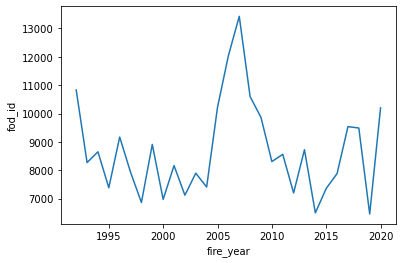

In [29]:
sns.lineplot(data=calfires_year, x="fire_year", y="fod_id")
plt.show()

In [34]:
calfires.columns

Index(['fod_id', 'fpa_id', 'fire_name', 'fire_year', 'discovery_date',
       'discovery_doy', 'discovery_time', 'nwcg_cause_classification',
       'nwcg_general_cause', 'cont_date', 'cont_doy', 'cont_time', 'fire_size',
       'fire_size_class', 'owner_descr', 'state', 'county', 'fips_code',
       'fips_name'],
      dtype='object')

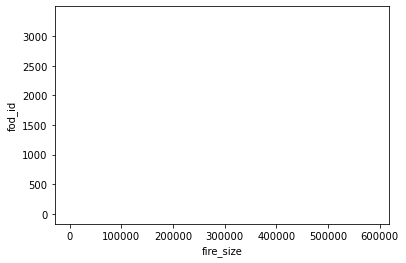

In [33]:
#distribution of firesizes in 2020
calfires_2020=pd.DataFrame(calfires[calfires["fire_year"]==2020].groupby(["fire_size"])['fod_id'].count())
# calfires_2020
sns.histplot(data=calfires_2020, x="fire_size", y="fod_id")
plt.show()

In [ ]:
#distributiion of firesize in 1992
calfires_1992=pd.DataFrame(calfires[calfires["fire_year"]==1992].groupby(["fire_size"])['fod_id'].count())
# calfires_1992
sns.histplot(data=calfires_1992, x="fire_size", y="fod_id")
plt.show()

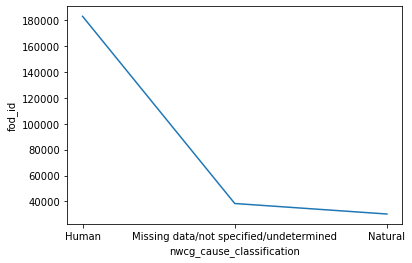

In [35]:
calfires_reasons=pd.DataFrame(calfires.groupby(["nwcg_cause_classification"])['fod_id'].count())
# calfires_1992
sns.lineplot(data=calfires_reasons, x="nwcg_cause_classification", y="fod_id")
plt.show()

In [42]:
calfires_natural=pd.DataFrame(calfires[calfires["nwcg_cause_classification"]=="Natural"].groupby(["nwcg_cause_classification"])['fod_id'].count())
calfires_natural

,fod_id
nwcg_cause_classification,
Natural,30290


In [51]:
calfires_natural=calfires[calfires["nwcg_cause_classification"]=="Natural"]


In [52]:
# calfires_natural["resolution_time"] = calfires_natural["cont_date"] - calfires_natural["discovery_date"]
calfires_natural.dtypes

fod_id                         int64
fpa_id                        object
fire_name                     object
fire_year                      int64
discovery_date                object
discovery_doy                  int64
discovery_time               float64
nwcg_cause_classification     object
nwcg_general_cause            object
cont_date                     object
cont_doy                     float64
cont_time                    float64
fire_size                    float64
fire_size_class               object
owner_descr                   object
state                         object
county                        object
fips_code                     object
fips_name                     object
dtype: object

In [55]:
fmt = '%Y/%m/%d %H:%M'  # or: infer_datetime_format=True

calfires_natural['discover_date'] = pd.to_datetime(calfires_natural['discovery_date'],
                                     format=fmt,
                                     errors='coerce')
calfires_natural['cont_date'] = pd.to_datetime(calfires_natural['cont_date'],
                                     format=fmt,
                                     errors='coerce')

C:\Users\susmi\AppData\Local\Temp/ipykernel_36404/2168028100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calfires_natural['discover_date'] = pd.to_datetime(calfires_natural['discovery_date'],
C:\Users\susmi\AppData\Local\Temp/ipykernel_36404/2168028100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calfires_natural['cont_date'] = pd.to_datetime(calfires_natural['cont_date'],
